# 1. Linear Regression 

## 1.1. Scratch

[Notion @tuanlda78202](https://tuanlda78202.notion.site/Linear-Regression-eec6ec1abcf54e5d8f0b1ec2db9d8e9e)

![](Image/2022-01-06-14-14-35.png)


![](Image/2022-01-06-14-14-50.png)

In [1]:
%pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt 

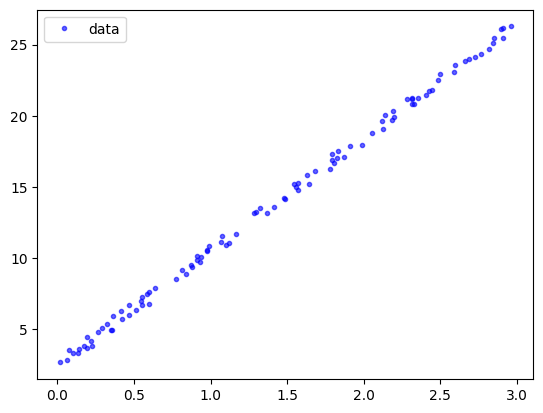

In [4]:
# Random data
np.random.seed(42)
X = 3 * np.random.rand(100,1)             # Matrix X has 1 -> n, this case X => vector  
y = 2 + 8 * X + np.random.rand(100,1)     # vector y has all 1 -> n 

# Visualize 
plt.plot(X, y, "b.", alpha = 0.6, label="data")
plt.legend()
plt.show()

As you can see, data points distributed make we can use LR, so we use `Normal Equation` in general case (we need convert X to X_bias, bsc we have bias in formula)

In [7]:
# Concatenate ones (bias) to X (for each row data)
# Note: ORDER OF CONCATENATE, bsc formula w0, w1, w2,...
X_bias = np.concatenate((np.ones((100,1)), X), axis = 1)
X_bias.shape

(100, 2)

In [8]:
w_best = np.linalg.pinv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)
w_best

array([[2.51359766],
       [7.98882279]])

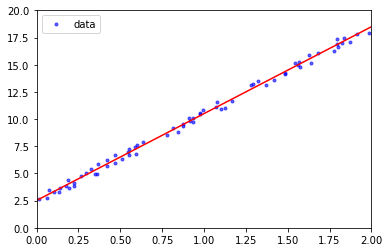

In [5]:
bias, weight = w_best[0][0], w_best[1][0]
plt.plot(X, y, "b.", alpha = 0.6, label="data")
plt.plot([0,2], [bias + 0*weight, bias + 2*weight], "r-")           # Plot continous 0 to 2 with y = formular LR 
plt.axis([0,2,0,20])
plt.legend()
plt.show()

## 1.2. Scikit-Learn

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [7]:
# Weight & bias 
lr.intercept_, lr.coef_

(array([2.51359766]), array([[7.98882279]]))

In [8]:
new = np.array([0,2]).reshape(-1,1)
# Predict 
lr.predict(new)

array([[ 2.51359766],
       [18.49124323]])

# 2. Polynomial Regression

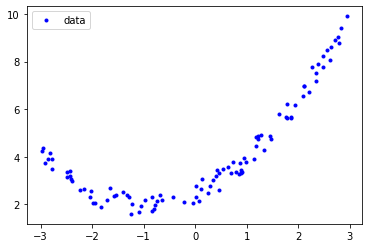

In [9]:
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(100,1)

# Visualize
plt.plot(X, y, "b.", label="data")
plt.legend()
plt.show()

`Scikit-Learn’s Polynomial Features` class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features (in this case there is just one feature)

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(2, include_bias=False)
X_poly = poly_feature.fit_transform(X)

print(X[0])
print(X_poly[0])

[0.85218988]
[0.85218988 0.72622759]


X_poly now contains the original feature of X plus the square of this feature. Now you can fit a LinearRegression model to this extended training data

In [11]:
# State feed data for machine 
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

In [12]:
# Predict with new data: convert X to X_poly -> predict y
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_feature.transform(X_new)

y_new = lr.predict(X_new_poly)

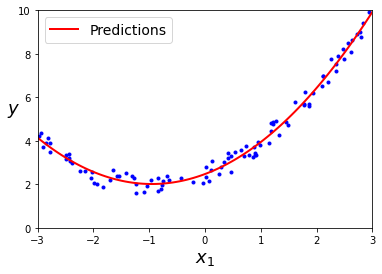

In [13]:
# Plot 
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

# Label 
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# 3. Ridge Regression

![](Image/2022-01-06-16-42-10.png)
![](Image/2022-01-06-16-36-47.png)

In [14]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X,y)
ridge.predict([[1]])

array([[4.95912068]])

# 4. Lasso Regression
Least Absolute Shrinkage and Selection Operator Regression

![](Image/2022-01-06-16-41-41.png)

In [15]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X,y)
lasso.predict([[1]])

array([4.67033214])